In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,PolynomialFeatures 
%matplotlib inline

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_237af5a5b5b840bd85d074b7b4b98f94 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4JpAfgxDdgH0JT7rklUoudr2_NSNtdLvcL0Kh9kLeRLZ',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_237af5a5b5b840bd85d074b7b4b98f94.get_object(Bucket='dscapstonechicagohome2-donotdelete-pr-3wdn5jn6njbrh5',Key='CSF3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

CSF3 = pd.read_csv(body)
CSF3.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Property,Address,Latitude,Longitude,Price $K,NaN
3,NaN,0,"1516 N Lake Shore Dr, Chicago, IL 60610",41.910000,-87.626340,"$6,000.00",NaN
4,NaN,1,"1919 N Dayton St, Chicago, IL 60614",41.916620,-87.649520,"$5,950.00",NaN


In [2]:
# Drop columns and rows that are not necessary 
CSF3.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 6'], axis=1, inplace=True)
CSF3.drop([0,1], axis=0, inplace=True)
CSF3.head()

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,Address,Latitude,Longitude,Price $K
3,"1516 N Lake Shore Dr, Chicago, IL 60610",41.910000,-87.626340,"$6,000.00"
4,"1919 N Dayton St, Chicago, IL 60614",41.916620,-87.649520,"$5,950.00"
5,"1421 N Astor St, Chicago, IL 60610",41.908310,-87.627430,"$6,800.00"
6,"1433 N State Pkwy, Chicago, IL 60610",41.908430,-87.628670,"$5,499.00"


In [3]:
new_header = CSF3.iloc[0] #grab the first row for the header
Chgo = CSF3[1:] #take the data less the header row and rename Chgo
Chgo.columns = new_header #set the header row as the dataframe header Chgo.head()
Chgo

2,Address,Latitude,Longitude,Price $K
3,"1516 N Lake Shore Dr, Chicago, IL 60610",41.910000,-87.626340,"$6,000.00"
4,"1919 N Dayton St, Chicago, IL 60614",41.916620,-87.649520,"$5,950.00"
5,"1421 N Astor St, Chicago, IL 60610",41.908310,-87.627430,"$6,800.00"
6,"1433 N State Pkwy, Chicago, IL 60610",41.908430,-87.628670,"$5,499.00"
7,"1425 N State Pkwy, Chicago, IL 60610",41.908340,-87.628670,"$5,950.00"
8,"1241 N State Pkwy, Chicago, IL 60610",41.905170,-87.628340,"$6,495.00"
9,"1912 N Orchard St, Chicago, IL 60614",41.916450,-87.646300,"$5,600.00"
10,"1431 N State Pkwy, Chicago, IL 60610",41.908410,-87.628670,"$5,100.00"
11,"1911 N Burling St, Chicago, IL 60614",41.916920,-87.647300,"$5,000.00"
12,"25 E Cedar St, Chicago, IL 60611",41.902290,-87.626930,"$5,999.00"


In [4]:
Chgo.dtypes

2
Address      object
Latitude     object
Longitude    object
Price $K     object
dtype: object

In [5]:
Chgo.reset_index(drop=True, inplace=True) 
Chgo.head()

2,Address,Latitude,Longitude,Price $K
0,"1516 N Lake Shore Dr, Chicago, IL 60610",41.910000,-87.626340,"$6,000.00"
1,"1919 N Dayton St, Chicago, IL 60614",41.916620,-87.649520,"$5,950.00"
2,"1421 N Astor St, Chicago, IL 60610",41.908310,-87.627430,"$6,800.00"
3,"1433 N State Pkwy, Chicago, IL 60610",41.908430,-87.628670,"$5,499.00"
4,"1425 N State Pkwy, Chicago, IL 60610",41.908340,-87.628670,"$5,950.00"


In [6]:
def clean_currency(x):
    """ 
    If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted 
    """
    if isinstance(x, str): return(x.replace('$', '').replace(',', '')) 
    return(x)

Chgo['Price $K'] = Chgo['Price $K'].apply(clean_currency).astype('float')
Chgo

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2,Address,Latitude,Longitude,Price $K
0,"1516 N Lake Shore Dr, Chicago, IL 60610",41.910000,-87.626340,6000.0
1,"1919 N Dayton St, Chicago, IL 60614",41.916620,-87.649520,5950.0
2,"1421 N Astor St, Chicago, IL 60610",41.908310,-87.627430,6800.0
3,"1433 N State Pkwy, Chicago, IL 60610",41.908430,-87.628670,5499.0
4,"1425 N State Pkwy, Chicago, IL 60610",41.908340,-87.628670,5950.0
5,"1241 N State Pkwy, Chicago, IL 60610",41.905170,-87.628340,6495.0
6,"1912 N Orchard St, Chicago, IL 60614",41.916450,-87.646300,5600.0
7,"1431 N State Pkwy, Chicago, IL 60610",41.908410,-87.628670,5100.0
8,"1911 N Burling St, Chicago, IL 60614",41.916920,-87.647300,5000.0
9,"25 E Cedar St, Chicago, IL 60611",41.902290,-87.626930,5999.0


In [7]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # Folium is a Python library that helps create a few types of interactive maps.
from folium.plugins import MarkerCluster

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [8]:
# Display map of Chicago and mark where these homes are located

Chgo_map = folium.Map(location=[41.8842, -87.6324], tiles = "Stamen Terrain", zoom_start=15)
# Uses latitude/longitude. Higher zoom number = closer in you get.

folium.Marker([41.881939, -87.627937], 
              popup='LOOP',
              icon=folium.Icon(color='orange') 
             ).add_to(Chgo_map)

folium.Marker([41.910000, -87.626340], 
              popup='1516 N Lake Shore Dr, $6MM',
              icon=folium.Icon(color='green', icon='cloud') 
             ).add_to(Chgo_map)

folium.Marker([41.916620, -87.649520], 
              popup='1919 N Dayton, $5.95M',
              icon=folium.Icon(color='lightred',icon='cloud', prefix='fa')
             ).add_to(Chgo_map)

folium.Marker([41.908310 ,-87.627430], 
            popup='1421 N Astor, $6.8M',
                icon=folium.Icon(color='blue',icon='cloud', prefix='fa')
            ).add_to(Chgo_map)

folium.Marker([41.908430, -87.628670], 
              popup='1433 N State, $5.499M',
              icon=folium.Icon(color='yellow',icon='cloud', prefix='fa') 
             ).add_to(Chgo_map)
              
folium.Marker([41.908340, -87.628670], 
              popup='1425 N State, $5.95M',
            icon=folium.Icon(color='purple',icon='cloud', prefix='fa') 
             ).add_to(Chgo_map)
              
folium.Marker([41.905170, -87.628340], 
              popup='1241 N State, $6.495M',
              icon=folium.Icon(color='lightgray',icon='cloud', prefix='fa') 
             ).add_to(Chgo_map)

folium.Marker([41.916450, -87.646300], 
              popup='1912 N Orchard, $5.6M',
              icon=folium.Icon(color='pink',icon='cloud', prefix='fa') 
             ).add_to(Chgo_map)

folium.Marker([41.908410, -87.628670], 
              popup='1431 N State, $5.1M',
            icon=folium.Icon(color='beige',icon='cloud', prefix='fa') 
             ).add_to(Chgo_map)

folium.Marker([41.916920, -87.647300],
              popup='1911 N Burling, $5M',
              icon=folium.Icon(color='black',icon='cloud', prefix='fa') 
             ).add_to(Chgo_map)

folium.Marker([41.902290, -87.626930], 
              popup='25 E Cedar, $5.999M',
              icon=folium.Icon(color='lightblue',icon='cloud', prefix='fa')
             ).add_to(Chgo_map)

folium.Marker([41.905410, -87.627520], 
              popup='1246 N Astor, $6.999M',
              icon=folium.Icon(color='lightgreen',icon='cloud', prefix= 'fa')
             ).add_to(Chgo_map)

Chgo_map # calls map of Chicago to display

In [9]:
import requests # library to handle requests
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Libraries imported.


In [23]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'VXOCST0MCZ0U5SSIRPJRIO1MM24RLD0DZNRZ50TV4QWQ1I00' # your Foursquare ID from account
CLIENT_SECRET = 'NDQFQ3HLBDKBEY0PARLGPXRX5KY1J2JQKFVCHJZOHSLCQFDR' # your Foursquare Secret from account
VERSION = '20200113' #'20180604'
LIMIT = 15
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VXOCST0MCZ0U5SSIRPJRIO1MM24RLD0DZNRZ50TV4QWQ1I00
CLIENT_SECRET:NDQFQ3HLBDKBEY0PARLGPXRX5KY1J2JQKFVCHJZOHSLCQFDR


In [24]:
address = '1912 N. Orchard Street, Chicago, IL' #Let's say we are at Citibank, Lincoln Park and get its lat/lon 
#41.918377, -87.648264

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

41.91645395 -87.64635147291955


In [25]:
search_query = 'School' # search for Store, Bar, Restaurant, School
radius = 1500
print(search_query + ' .... OK!')

School .... OK!


In [26]:
#Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=VXOCST0MCZ0U5SSIRPJRIO1MM24RLD0DZNRZ50TV4QWQ1I00&client_secret=NDQFQ3HLBDKBEY0PARLGPXRX5KY1J2JQKFVCHJZOHSLCQFDR&ll=41.91645395,-87.64635147291955&v=20200113&query=School&radius=1500&limit=15'

In [27]:
#Send the GET Request and examine the results
results = requests.get(url).json()
results #schools

{'meta': {'code': 200, 'requestId': '5e1ddd2aedbcad001bf41e92'},
 'response': {'venues': [{'id': '4acd2795f964a52017cb20e3',
    'name': 'Old Town School of Folk Music',
    'location': {'address': '4544 N Lincoln Ave',
     'crossStreet': 'Wilson',
     'lat': 41.91809125741104,
     'lng': -87.65144855897087,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.91809125741104,
       'lng': -87.65144855897087}],
     'distance': 459,
     'postalCode': '60614',
     'cc': 'US',
     'city': 'Chicago',
     'state': 'IL',
     'country': 'United States',
     'formattedAddress': ['4544 N Lincoln Ave (Wilson)',
      'Chicago, IL 60614',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1f2931735',
      'name': 'Performing Arts Venue',
      'pluralName': 'Performing Arts Venues',
      'shortName': 'Performing Arts',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/performingarts_',
       'suffix': '.png'},
      'primary'

In [28]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe #schools

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1f2931735', 'name': 'P...",False,4acd2795f964a52017cb20e3,4544 N Lincoln Ave,US,Chicago,United States,Wilson,459,"[4544 N Lincoln Ave (Wilson), Chicago, IL 6061...","[{'label': 'display', 'lat': 41.91809125741104...",41.918091,-87.651449,NaN,60614,IL,Old Town School of Folk Music,v-1579015483
1,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4b1bd015f964a520a2fd23e3,330 W Webster Ave,US,Chicago,United States,NaN,962,"[330 W Webster Ave, Chicago, IL 60614, United ...","[{'label': 'display', 'lat': 41.92284239104967...",41.922842,-87.638516,Lincoln Park,60614,IL,Francis W. Parker School,v-1579015483
2,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,4b829b46f964a52079da30e3,2109 North Fremont St.,US,Chicago,United States,Dickens,538,"[2109 North Fremont St. (Dickens), Chicago, IL...","[{'label': 'display', 'lat': 41.92007266945801...",41.920073,-87.650666,NaN,60614,IL,St. James School,v-1579015483
3,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4c90fbd97088a143f419ad43,59 W North Blvd,US,Chicago,United States,NaN,1437,"[59 W North Blvd, Chicago, IL 60610, United St...","[{'label': 'display', 'lat': 41.91059677372507...",41.910597,-87.630881,NaN,60610,IL,Latin School of Chicago,v-1579015483
4,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4b68c31df964a5208d8b2be3,2001 N Orchard St,US,Chicago,United States,Armitage,257,"[2001 N Orchard St (Armitage), Chicago, IL 606...","[{'label': 'display', 'lat': 41.91862400974852...",41.918624,-87.647427,NaN,60614,IL,Lincoln Park High School,v-1579015483
5,"[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",False,4c1ece91b306c9287aaa67b7,2442 N Lincoln Ave Fl 2,US,Chicago,United States,NaN,1142,"[2442 N Lincoln Ave Fl 2, Chicago, IL 60614, U...","[{'label': 'display', 'lat': 41.92628583710019...",41.926286,-87.650324,NaN,60614,IL,Chicago School of Hot Yoga,v-1579015483
6,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",False,52aa4d39498e8b85b2b5c5c9,615 W Kemper Pl,US,Chicago,United States,NaN,918,"[615 W Kemper Pl, Chicago, IL 60614, United St...","[{'label': 'display', 'lat': 41.92458168535752...",41.924582,-87.644459,NaN,60614,IL,Abraham Lincoln Elementary School,v-1579015483
7,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",False,4d8ba29ba851a0901a25e21b,122 S Michigan Ave,US,Chicago,United States,Suite 1070,1542,"[122 S Michigan Ave (Suite 1070), Chicago, IL ...","[{'label': 'display', 'lat': 41.9046924208071,...",41.904692,-87.636517,NaN,60603,IL,Graduate School USA,v-1579015483
8,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,4bd5fb786f6495210e1370ec,814 W Eastman St,US,Chicago,United States,NaN,1000,"[814 W Eastman St, Chicago, IL 60642, United S...","[{'label': 'display', 'lat': 41.9076558823306,...",41.907656,-87.648804,NaN,60642,IL,The British School Of Chicago,v-1579015483
9,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,4b61e60cf964a520f3292ae3,2145 N Halsted St,US,Chicago,United States,NaN,594,"[2145 N Halsted St, Chicago, IL 60614, United ...","[{'label': 'display', 'lat': 41.92153473195482...",41.921535,-87.648551,NaN,60614,IL,St. Vincent DePaul School,v-1579015483


In [29]:
#Define information of interest and filter dataframe

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered #schools

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Old Town School of Folk Music,Performing Arts Venue,4544 N Lincoln Ave,US,Chicago,United States,Wilson,459,"[4544 N Lincoln Ave (Wilson), Chicago, IL 6061...","[{'label': 'display', 'lat': 41.91809125741104...",41.918091,-87.651449,NaN,60614,IL,4acd2795f964a52017cb20e3
1,Francis W. Parker School,High School,330 W Webster Ave,US,Chicago,United States,NaN,962,"[330 W Webster Ave, Chicago, IL 60614, United ...","[{'label': 'display', 'lat': 41.92284239104967...",41.922842,-87.638516,Lincoln Park,60614,IL,4b1bd015f964a520a2fd23e3
2,St. James School,School,2109 North Fremont St.,US,Chicago,United States,Dickens,538,"[2109 North Fremont St. (Dickens), Chicago, IL...","[{'label': 'display', 'lat': 41.92007266945801...",41.920073,-87.650666,NaN,60614,IL,4b829b46f964a52079da30e3
3,Latin School of Chicago,High School,59 W North Blvd,US,Chicago,United States,NaN,1437,"[59 W North Blvd, Chicago, IL 60610, United St...","[{'label': 'display', 'lat': 41.91059677372507...",41.910597,-87.630881,NaN,60610,IL,4c90fbd97088a143f419ad43
4,Lincoln Park High School,High School,2001 N Orchard St,US,Chicago,United States,Armitage,257,"[2001 N Orchard St (Armitage), Chicago, IL 606...","[{'label': 'display', 'lat': 41.91862400974852...",41.918624,-87.647427,NaN,60614,IL,4b68c31df964a5208d8b2be3
5,Chicago School of Hot Yoga,Yoga Studio,2442 N Lincoln Ave Fl 2,US,Chicago,United States,NaN,1142,"[2442 N Lincoln Ave Fl 2, Chicago, IL 60614, U...","[{'label': 'display', 'lat': 41.92628583710019...",41.926286,-87.650324,NaN,60614,IL,4c1ece91b306c9287aaa67b7
6,Abraham Lincoln Elementary School,Elementary School,615 W Kemper Pl,US,Chicago,United States,NaN,918,"[615 W Kemper Pl, Chicago, IL 60614, United St...","[{'label': 'display', 'lat': 41.92458168535752...",41.924582,-87.644459,NaN,60614,IL,52aa4d39498e8b85b2b5c5c9
7,Graduate School USA,General College & University,122 S Michigan Ave,US,Chicago,United States,Suite 1070,1542,"[122 S Michigan Ave (Suite 1070), Chicago, IL ...","[{'label': 'display', 'lat': 41.9046924208071,...",41.904692,-87.636517,NaN,60603,IL,4d8ba29ba851a0901a25e21b
8,The British School Of Chicago,School,814 W Eastman St,US,Chicago,United States,NaN,1000,"[814 W Eastman St, Chicago, IL 60642, United S...","[{'label': 'display', 'lat': 41.9076558823306,...",41.907656,-87.648804,NaN,60642,IL,4bd5fb786f6495210e1370ec
9,St. Vincent DePaul School,School,2145 N Halsted St,US,Chicago,United States,NaN,594,"[2145 N Halsted St, Chicago, IL 60614, United ...","[{'label': 'display', 'lat': 41.92153473195482...",41.921535,-87.648551,NaN,60614,IL,4b61e60cf964a520f3292ae3


In [30]:
dataframe_filtered.name

0         Old Town School of Folk Music
1              Francis W. Parker School
2                      St. James School
3               Latin School of Chicago
4              Lincoln Park High School
5            Chicago School of Hot Yoga
6     Abraham Lincoln Elementary School
7                   Graduate School USA
8         The British School Of Chicago
9             St. Vincent DePaul School
10            Lincoln Park Annex School
11     Oscar Mayer School- Club Bulldog
12                      Mulligan School
13                      School Bus Stop
14         School House Pub. and Eatery
Name: name, dtype: object

In [31]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centered around a house in Lincoln Park

# add a red circle marker to represent a house centrally located in Lincoln Park
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='House',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the VENUES as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map #schools

In [32]:
search_query = 'Store' # search for Store, Bar, Restaurant, School
radius = 1500
print(search_query + ' .... OK!')

Store .... OK!


In [33]:
#Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url #store

'https://api.foursquare.com/v2/venues/search?client_id=VXOCST0MCZ0U5SSIRPJRIO1MM24RLD0DZNRZ50TV4QWQ1I00&client_secret=NDQFQ3HLBDKBEY0PARLGPXRX5KY1J2JQKFVCHJZOHSLCQFDR&ll=41.91645395,-87.64635147291955&v=20200113&query=Store&radius=1500&limit=15'

In [34]:
#Send the GET Request and examine the results
results = requests.get(url).json()
results #store

{'meta': {'code': 200, 'requestId': '5e1ddd680be7b4001bb0daaa'},
 'response': {'venues': [{'id': '528f9dbb498e605f09e1303b',
    'name': '#IntelCHI Intel Experience Store',
    'location': {'address': '901 W Armitage Ave',
     'crossStreet': 'at N Fremont',
     'lat': 41.918133623232336,
     'lng': -87.6511158570735,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.918133623232336,
       'lng': -87.6511158570735}],
     'distance': 436,
     'postalCode': '60614',
     'cc': 'US',
     'city': 'Chicago',
     'state': 'IL',
     'country': 'United States',
     'formattedAddress': ['901 W Armitage Ave (at N Fremont)',
      'Chicago, IL 60614',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1ff941735',
      'name': 'Miscellaneous Shop',
      'pluralName': 'Miscellaneous Shops',
      'shortName': 'Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_',
       'suffix': '.png'},
      'primary': True}],
    'venuePa

In [35]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframeStore = json_normalize(venues)
dataframeStore 

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...",False,528f9dbb498e605f09e1303b,901 W Armitage Ave,US,Chicago,United States,at N Fremont,436,"[901 W Armitage Ave (at N Fremont), Chicago, I...","[{'label': 'display', 'lat': 41.91813362323233...",41.918134,-87.651116,60614,IL,#IntelCHI Intel Experience Store,v-1579015528,72172485
1,"[{'id': '4bf58dd8d48988d101951735', 'name': 'T...",False,4a9abc9bf964a5206c3220e3,2270 N. Clybourn Ave.,US,Chicago,United States,btwn Ashland & Greenview,1937,[2270 N. Clybourn Ave. (btwn Ashland & Greenvi...,"[{'label': 'display', 'lat': 41.92327567011136...",41.923276,-87.667872,60614,IL,Salvation Army Family Store,v-1579015528,NaN
2,"[{'id': '4bf58dd8d48988d1f4941735', 'name': 'D...",False,4ae4aa35f964a520ec9c21e3,1873 N Clybourn Ave,US,Chicago,United States,NaN,754,"[1873 N Clybourn Ave, Chicago, IL 60614, Unite...","[{'label': 'display', 'lat': 41.91531124633243...",41.915311,-87.655335,60614,IL,FLOR Store,v-1579015528,NaN
3,"[{'id': '52f2ab2ebcbc57f1066b8b1f', 'name': 'S...",False,4bba779a7421a59334dbc340,1341 W Fullerton Ave,US,Chicago,United States,NaN,1594,"[1341 W Fullerton Ave, Chicago, IL 60614, Unit...","[{'label': 'display', 'lat': 41.92489738612612...",41.924897,-87.661899,60614,IL,The UPS Store,v-1579015528,NaN
4,"[{'id': '4bf58dd8d48988d1f8941735', 'name': 'F...",False,4a75e959f964a520a2e11fe3,908 W North Ave,US,Chicago,United States,btwn N Sheffield Ave & N Fremont St,751,[908 W North Ave (btwn N Sheffield Ave & N Fre...,"[{'label': 'display', 'lat': 41.91095772714919...",41.910958,-87.651618,60642,IL,The Container Store,v-1579015528,NaN
5,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",False,4ae32debf964a520599121e3,2002 N Halsted St,US,Chicago,United States,at Armitage Ave.,282,"[2002 N Halsted St (at Armitage Ave.), Chicago...","[{'label': 'display', 'lat': 41.91835677396281...",41.918357,-87.648608,60614,IL,The Store,v-1579015528,NaN
6,"[{'id': '52f2ab2ebcbc57f1066b8b1f', 'name': 'S...",False,4b9f8d0ef964a520b32a37e3,"1953 N Clybourn Ave, Ste R",US,Chicago,United States,NaN,950,"[1953 N Clybourn Ave, Ste R, Chicago, IL 60614...","[{'label': 'display', 'lat': 41.91730250651034...",41.917303,-87.657768,60614,IL,The UPS Store,v-1579015528,NaN
7,"[{'id': '4bf58dd8d48988d1fe941735', 'name': 'M...",False,59c810ebdb1d8114b5c1aaf9,NaN,US,Chicago,United States,NaN,452,"[Chicago, IL 60614, United States]","[{'label': 'display', 'lat': 41.918034, 'lng':...",41.918034,-87.651384,60614,IL,The Music Store,v-1579015528,NaN
8,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4dc6d441ae608779d15d72c2,"2325 North Clark Street Chicago, IL 60614-6472 -",US,Chicago,United States,NaN,1110,"[2325 North Clark Street Chicago, IL 60614-647...","[{'label': 'display', 'lat': 41.9248610887386,...",41.924861,-87.639139,NaN,IL,Store Your Things,v-1579015528,NaN
9,"[{'id': '4bf58dd8d48988d128951735', 'name': 'G...",False,4dbc24066e810768bf55d66a,Lincoln Park Zoo,US,Chicago,United States,NaN,1209,"[Lincoln Park Zoo, Chicago, IL 60614, United S...","[{'label': 'display', 'lat': 41.9218106816323,...",41.921811,-87.633652,60614,IL,Wild Things! Zoo Store,v-1579015528,NaN


In [36]:
#Define information of interest and filter dataframe

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframeStore.columns if col.startswith('location.')] + ['id']
dataframe_filteredStore = dataframeStore.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filteredStore['categories'] = dataframe_filteredStore.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filteredStore.columns = [column.split('.')[-1] for column in dataframe_filteredStore.columns]

dataframe_filteredStore

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,#IntelCHI Intel Experience Store,Miscellaneous Shop,901 W Armitage Ave,US,Chicago,United States,at N Fremont,436,"[901 W Armitage Ave (at N Fremont), Chicago, I...","[{'label': 'display', 'lat': 41.91813362323233...",41.918134,-87.651116,60614,IL,528f9dbb498e605f09e1303b
1,Salvation Army Family Store,Thrift / Vintage Store,2270 N. Clybourn Ave.,US,Chicago,United States,btwn Ashland & Greenview,1937,[2270 N. Clybourn Ave. (btwn Ashland & Greenvi...,"[{'label': 'display', 'lat': 41.92327567011136...",41.923276,-87.667872,60614,IL,4a9abc9bf964a5206c3220e3
2,FLOR Store,Design Studio,1873 N Clybourn Ave,US,Chicago,United States,NaN,754,"[1873 N Clybourn Ave, Chicago, IL 60614, Unite...","[{'label': 'display', 'lat': 41.91531124633243...",41.915311,-87.655335,60614,IL,4ae4aa35f964a520ec9c21e3
3,The UPS Store,Shipping Store,1341 W Fullerton Ave,US,Chicago,United States,NaN,1594,"[1341 W Fullerton Ave, Chicago, IL 60614, Unit...","[{'label': 'display', 'lat': 41.92489738612612...",41.924897,-87.661899,60614,IL,4bba779a7421a59334dbc340
4,The Container Store,Furniture / Home Store,908 W North Ave,US,Chicago,United States,btwn N Sheffield Ave & N Fremont St,751,[908 W North Ave (btwn N Sheffield Ave & N Fre...,"[{'label': 'display', 'lat': 41.91095772714919...",41.910958,-87.651618,60642,IL,4a75e959f964a520a2e11fe3
5,The Store,Bar,2002 N Halsted St,US,Chicago,United States,at Armitage Ave.,282,"[2002 N Halsted St (at Armitage Ave.), Chicago...","[{'label': 'display', 'lat': 41.91835677396281...",41.918357,-87.648608,60614,IL,4ae32debf964a520599121e3
6,The UPS Store,Shipping Store,"1953 N Clybourn Ave, Ste R",US,Chicago,United States,NaN,950,"[1953 N Clybourn Ave, Ste R, Chicago, IL 60614...","[{'label': 'display', 'lat': 41.91730250651034...",41.917303,-87.657768,60614,IL,4b9f8d0ef964a520b32a37e3
7,The Music Store,Music Store,NaN,US,Chicago,United States,NaN,452,"[Chicago, IL 60614, United States]","[{'label': 'display', 'lat': 41.918034, 'lng':...",41.918034,-87.651384,60614,IL,59c810ebdb1d8114b5c1aaf9
8,Store Your Things,Office,"2325 North Clark Street Chicago, IL 60614-6472 -",US,Chicago,United States,NaN,1110,"[2325 North Clark Street Chicago, IL 60614-647...","[{'label': 'display', 'lat': 41.9248610887386,...",41.924861,-87.639139,NaN,IL,4dc6d441ae608779d15d72c2
9,Wild Things! Zoo Store,Gift Shop,Lincoln Park Zoo,US,Chicago,United States,NaN,1209,"[Lincoln Park Zoo, Chicago, IL 60614, United S...","[{'label': 'display', 'lat': 41.9218106816323,...",41.921811,-87.633652,60614,IL,4dbc24066e810768bf55d66a


In [28]:
dataframe_filteredStore.name

0                      #IntelCHI Intel Experience Store
1                           Salvation Army Family Store
2                                            FLOR Store
3                                   The Container Store
4                                             The Store
5                                         The UPS Store
6                                         The UPS Store
7                                       The Music Store
8                                Wild Things! Zoo Store
9                                         The UPS Store
10           Loyola University Water Tower Campus Store
11                                    Store Your Things
12                                        The UPS Store
13                                   Apple Lincoln Park
14                                  The PaperDoll Store
15                              Judy Maxwell Home Store
16                                        The UPS Store
17                             XFINITY Store by 

In [37]:
venues_mapStore = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centered around a Lincoln Park house

# add a red circle marker to represent house centrally located in Lincoln Park
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='House',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_mapStore)

# add the VENUES as blue circle markers
for lat, lng, label in zip(dataframe_filteredStore.lat, dataframe_filteredStore.lng, dataframe_filteredStore.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_mapStore)

# display map
venues_mapStore

In [44]:
search_query = 'Restaurant' # search for Store, Bar, Restaurant, School
radius = 1500
print(search_query + ' .... OK!')

Restaurant .... OK!


In [45]:
#Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url #Restaurant

'https://api.foursquare.com/v2/venues/search?client_id=VXOCST0MCZ0U5SSIRPJRIO1MM24RLD0DZNRZ50TV4QWQ1I00&client_secret=NDQFQ3HLBDKBEY0PARLGPXRX5KY1J2JQKFVCHJZOHSLCQFDR&ll=41.91645395,-87.64635147291955&v=20200113&query=Restaurant&radius=1500&limit=15'

In [46]:
#Send the GET Request and examine the results
results = requests.get(url).json()
results #Restaurant

{'meta': {'code': 200, 'requestId': '5e1dddc2be61c9001b01f122'},
 'response': {'venues': [{'id': '4a4838fdf964a520a5aa1fe3',
    'name': 'Allende Restaurant',
    'location': {'address': '2221 N Lincoln Ave',
     'crossStreet': 'at W. Webster Ave.',
     'lat': 41.922480646113755,
     'lng': -87.64456682177598,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.922480646113755,
       'lng': -87.64456682177598}],
     'distance': 686,
     'postalCode': '60614',
     'cc': 'US',
     'city': 'Chicago',
     'state': 'IL',
     'country': 'United States',
     'formattedAddress': ['2221 N Lincoln Ave (at W. Webster Ave.)',
      'Chicago, IL 60614',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1c1941735',
      'name': 'Mexican Restaurant',
      'pluralName': 'Mexican Restaurants',
      'shortName': 'Mexican',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mexican_',
       'suffix': '.png'},
      'primary': True}],
    'deliv

In [47]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframeRest = json_normalize(venues)
dataframeRest #Restaurant 

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",1479515,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/allende-res...,False,4a4838fdf964a520a5aa1fe3,2221 N Lincoln Ave,...,686,"[2221 N Lincoln Ave (at W. Webster Ave.), Chic...","[{'label': 'display', 'lat': 41.92248064611375...",41.922481,-87.644567,60614,IL,Allende Restaurant,v-1579015614,NaN
1,"[{'id': '58daa1558bbb0b01f18ec1b4', 'name': 'K...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b16f859f964a52047c023e3,1030 W. Division Street,...,1542,"[1030 W. Division Street (at N Cherry Ave), Ch...","[{'label': 'display', 'lat': 41.90368842316866...",41.903688,-87.653601,60642,IL,Jetro/Restaurant Depot,v-1579015614,NaN
2,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",785,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/orsos-1401-...,False,40b28c80f964a520bffb1ee3,1401 N Wells St,...,1371,"[1401 N Wells St (at W Schiller St), Chicago, ...","[{'label': 'display', 'lat': 41.90773266357293...",41.907733,-87.634659,60610,IL,Orso's Restaurant,v-1579015614,NaN
3,"[{'id': '4bf58dd8d48988d144941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,5439bbb1498ef7b662722a11,734 W Fullerton Ave,...,1020,"[734 W Fullerton Ave, Chicago, IL 60614, Unite...","[{'label': 'display', 'lat': 41.92556492857423...",41.925565,-87.647701,60614,IL,Epiphany Restaurant and Bar,v-1579015614,NaN
4,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b59fe5ef964a5205ba628e3,2114 N Halsted St,...,483,[2114 N Halsted St (btwn Webster & Dickens Ave...,"[{'label': 'display', 'lat': 41.92044208413386...",41.920442,-87.648653,60614,IL,Nookies Too Restaurant,v-1579015614,NaN
5,"[{'id': '4bf58dd8d48988d1df931735', 'name': 'B...",1398419,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/twin-anchor...,False,49cfdb98f964a520d45a1fe3,1655 N Sedgwick St,...,762,"[1655 N Sedgwick St (at Eugenie St), Chicago, ...","[{'label': 'display', 'lat': 41.91274197179966...",41.912742,-87.638619,60614,IL,Twin Anchors Restaurant & Tavern,v-1579015614,55133878
6,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",764990,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/green-tea-j...,False,4c3e056a80bc20a17d6eaa58,2206 N Clark St,...,912,"[2206 N Clark St (at W Webster Ave), Chicago, ...","[{'label': 'display', 'lat': 41.92218509021109...",41.922185,-87.638478,60614,IL,Green Tea Japanese Restaurant,v-1579015614,NaN
7,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,False,53a1bc09498e54415d5afc84,NaN,...,625,"[Chicago, IL, United States]","[{'label': 'display', 'lat': 41.91811370849609...",41.918114,-87.653572,NaN,IL,Bakery & Restaurant,v-1579015614,NaN
8,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",NaN,NaN,NaN,NaN,NaN,NaN,False,4f32607719836c91c7d1c644,954 W Willow St,...,636,"[954 W Willow St, Chicago, IL 60614, United St...","[{'label': 'display', 'lat': 41.913832, 'lng':...",41.913832,-87.653179,60614,IL,Chicago's Restaurant and Entertainment Guide,v-1579015614,NaN
9,"[{'id': '4eb1d5724b900d56c88a45fe', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,53e2d17d498ef9d06b0c88a5,1751 N Sheffield Ave,...,650,"[1751 N Sheffield Ave (at W Willow St), Chicag...","[{'label': 'display', 'lat': 41.913397, 'lng':...",41.913397,-87.653042,60614,IL,Sumo Mongolian Restaurant,v-1579015614,NaN


In [48]:
#Define information of interest and filter dataframe

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframeRest.columns if col.startswith('location.')] + ['id']
dataframe_filteredRest = dataframeRest.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filteredRest['categories'] = dataframe_filteredRest.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filteredRest.columns = [column.split('.')[-1] for column in dataframe_filteredRest.columns]

dataframe_filteredRest

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Allende Restaurant,Mexican Restaurant,2221 N Lincoln Ave,US,Chicago,United States,at W. Webster Ave.,686,"[2221 N Lincoln Ave (at W. Webster Ave.), Chic...","[{'label': 'display', 'lat': 41.92248064611375...",41.922481,-87.644567,60614,IL,4a4838fdf964a520a5aa1fe3
1,Jetro/Restaurant Depot,Kitchen Supply Store,1030 W. Division Street,US,Chicago,United States,at N Cherry Ave,1542,"[1030 W. Division Street (at N Cherry Ave), Ch...","[{'label': 'display', 'lat': 41.90368842316866...",41.903688,-87.653601,60642,IL,4b16f859f964a52047c023e3
2,Orso's Restaurant,Italian Restaurant,1401 N Wells St,US,Chicago,United States,at W Schiller St,1371,"[1401 N Wells St (at W Schiller St), Chicago, ...","[{'label': 'display', 'lat': 41.90773266357293...",41.907733,-87.634659,60610,IL,40b28c80f964a520bffb1ee3
3,Epiphany Restaurant and Bar,Caribbean Restaurant,734 W Fullerton Ave,US,Chicago,United States,NaN,1020,"[734 W Fullerton Ave, Chicago, IL 60614, Unite...","[{'label': 'display', 'lat': 41.92556492857423...",41.925565,-87.647701,60614,IL,5439bbb1498ef7b662722a11
4,Nookies Too Restaurant,Breakfast Spot,2114 N Halsted St,US,Chicago,United States,btwn Webster & Dickens Ave,483,[2114 N Halsted St (btwn Webster & Dickens Ave...,"[{'label': 'display', 'lat': 41.92044208413386...",41.920442,-87.648653,60614,IL,4b59fe5ef964a5205ba628e3
5,Twin Anchors Restaurant & Tavern,BBQ Joint,1655 N Sedgwick St,US,Chicago,United States,at Eugenie St,762,"[1655 N Sedgwick St (at Eugenie St), Chicago, ...","[{'label': 'display', 'lat': 41.91274197179966...",41.912742,-87.638619,60614,IL,49cfdb98f964a520d45a1fe3
6,Green Tea Japanese Restaurant,Sushi Restaurant,2206 N Clark St,US,Chicago,United States,at W Webster Ave,912,"[2206 N Clark St (at W Webster Ave), Chicago, ...","[{'label': 'display', 'lat': 41.92218509021109...",41.922185,-87.638478,60614,IL,4c3e056a80bc20a17d6eaa58
7,Bakery & Restaurant,Bakery,NaN,US,Chicago,United States,NaN,625,"[Chicago, IL, United States]","[{'label': 'display', 'lat': 41.91811370849609...",41.918114,-87.653572,NaN,IL,53a1bc09498e54415d5afc84
8,Chicago's Restaurant and Entertainment Guide,Food,954 W Willow St,US,Chicago,United States,NaN,636,"[954 W Willow St, Chicago, IL 60614, United St...","[{'label': 'display', 'lat': 41.913832, 'lng':...",41.913832,-87.653179,60614,IL,4f32607719836c91c7d1c644
9,Sumo Mongolian Restaurant,Mongolian Restaurant,1751 N Sheffield Ave,US,Chicago,United States,at W Willow St,650,"[1751 N Sheffield Ave (at W Willow St), Chicag...","[{'label': 'display', 'lat': 41.913397, 'lng':...",41.913397,-87.653042,60614,IL,53e2d17d498ef9d06b0c88a5


In [49]:
dataframe_filteredRest.name

0                               Allende Restaurant
1                           Jetro/Restaurant Depot
2                                Orso's Restaurant
3                      Epiphany Restaurant and Bar
4                           Nookies Too Restaurant
5                 Twin Anchors Restaurant & Tavern
6                    Green Tea Japanese Restaurant
7                              Bakery & Restaurant
8     Chicago's Restaurant and Entertainment Guide
9                        Sumo Mongolian Restaurant
10                    Zia A New Mexican Restaurant
11                                 Bobo Restaurant
12                             Bus Stop Restaurant
13                            New Zaika Restaurant
14                                Tabaq Restaurant
Name: name, dtype: object

In [50]:
venues_mapRest = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centered around a Lincoln Park house

# add a red circle marker to represent house centrally located in Lincoln Park
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='House',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_mapRest)

# add the VENUES as blue circle markers
for lat, lng, label in zip(dataframe_filteredRest.lat, dataframe_filteredRest.lng, dataframe_filteredRest.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_mapRest)

# display map
venues_mapRest

In [51]:
search_query = 'Bar' # search for Store, Bar, Restaurant, School
radius = 1500
print(search_query + ' .... OK!')

Bar .... OK!


In [52]:
#Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url #Bar

'https://api.foursquare.com/v2/venues/search?client_id=VXOCST0MCZ0U5SSIRPJRIO1MM24RLD0DZNRZ50TV4QWQ1I00&client_secret=NDQFQ3HLBDKBEY0PARLGPXRX5KY1J2JQKFVCHJZOHSLCQFDR&ll=41.91645395,-87.64635147291955&v=20200113&query=Bar&radius=1500&limit=15'

In [53]:
#Send the GET Request and examine the results
results = requests.get(url).json()
results #Bar

{'meta': {'code': 200, 'requestId': '5e1dddc914a126001b50dcbd'},
 'response': {'venues': [{'id': '4beaec98ca97d13a88976c77',
    'name': '1550 Bar',
    'location': {'address': '1550 N Kingsbury St',
     'crossStreet': 'Whole Foods',
     'lat': 41.90912714347349,
     'lng': -87.65284000853389,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.90912714347349,
       'lng': -87.65284000853389}],
     'distance': 976,
     'postalCode': '60642',
     'cc': 'US',
     'city': 'Chicago',
     'state': 'IL',
     'country': 'United States',
     'formattedAddress': ['1550 N Kingsbury St (Whole Foods)',
      'Chicago, IL 60642',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d116941735',
      'name': 'Bar',
      'pluralName': 'Bars',
      'shortName': 'Bar',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1579015650',
    'hasPerk': False},
   {'id': 

In [54]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframeBar = json_normalize(venues)
dataframeBar #Bar

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,False,4beaec98ca97d13a88976c77,1550 N Kingsbury St,...,"[1550 N Kingsbury St (Whole Foods), Chicago, I...","[{'label': 'display', 'lat': 41.90912714347349...",41.909127,-87.652840,NaN,60642,IL,1550 Bar,v-1579015650,NaN
1,"[{'id': '4bf58dd8d48988d11d941735', 'name': 'S...",281294,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/joes-bar-94...,False,4b4819bdf964a5203d4826e3,940 W Weed St,...,[940 W Weed St (btwn N Fremont St & N Sheffiel...,"[{'label': 'display', 'lat': 41.91004421912546...",41.910044,-87.652174,NaN,60642,IL,Joe's Bar,v-1579015650,79897762
2,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",292296,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/burger-bar-...,False,4c002683c30a2d7f3b1a121d,1578 N Clybourn Ave,...,[1578 N Clybourn Ave (btwn Dayton St & Weed St...,"[{'label': 'display', 'lat': 41.91037517321531...",41.910375,-87.648493,NaN,60642,IL,Burger Bar,v-1579015650,63240385
3,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",288589,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/protein-bar...,False,52ebeee1498eed227ebec665,1953 N Clybourn Ave,...,"[1953 N Clybourn Ave (Armitage), Chicago, IL 6...","[{'label': 'display', 'lat': 41.916933, 'lng':...",41.916933,-87.657323,NaN,60614,IL,Protein Bar & Kitchen,v-1579015650,NaN
4,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",NaN,NaN,NaN,NaN,NaN,NaN,False,4e87dde48b8130f2514bc133,1578 N Clybourn Ave,...,"[1578 N Clybourn Ave (North Ave.), Chicago, IL...","[{'label': 'display', 'lat': 41.910157, 'lng':...",41.910157,-87.648937,NaN,60642,IL,Burger Bar,v-1579015650,NaN
5,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,False,4af3836df964a5204bee21e3,2436 N Clark St,...,"[2436 N Clark St (at W Arlington Pl), Chicago,...","[{'label': 'display', 'lat': 41.92647531933380...",41.926475,-87.641232,Park West,60614,IL,The Other Side Bar,v-1579015650,120500552
6,"[{'id': '4bf58dd8d48988d11f941735', 'name': 'N...",NaN,NaN,NaN,NaN,NaN,NaN,False,4e8e756d4901aab81b012541,2247 N Lincoln Ave,...,"[2247 N Lincoln Ave, Chicago, IL 60614, United...","[{'label': 'display', 'lat': 41.92297139377511...",41.922971,-87.645325,NaN,60614,IL,Decibel Affairs @ Max Bar,v-1579015650,NaN
7,"[{'id': '4bf58dd8d48988d144941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,5439bbb1498ef7b662722a11,734 W Fullerton Ave,...,"[734 W Fullerton Ave, Chicago, IL 60614, Unite...","[{'label': 'display', 'lat': 41.92556492857423...",41.925565,-87.647701,NaN,60614,IL,Epiphany Restaurant and Bar,v-1579015650,NaN
8,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",315435,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/the-warehou...,False,55fb60df498e02b96424e4f5,1419 W Fullerton Ave,...,"[1419 W Fullerton Ave, Chicago, IL 60614, Unit...","[{'label': 'display', 'lat': 41.92493, 'lng': ...",41.924930,-87.664110,NaN,60614,IL,The Warehouse Bar & Pizzeria Chicago,v-1579015650,427895758
9,"[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",NaN,NaN,NaN,NaN,NaN,NaN,False,40b28c80f964a5204afc1ee3,1157 W Wrightwood Ave,...,"[1157 W Wrightwood Ave, Chicago, IL 60614, Uni...","[{'label': 'display', 'lat': 41.92754953343718...",41.927550,-87.660504,NaN,60614,IL,Monkey Paw Bar,v-1579015650,NaN


In [55]:
#Define information of interest and filter dataframe

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframeBar.columns if col.startswith('location.')] + ['id']
dataframe_filteredBar = dataframeBar.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filteredBar['categories'] = dataframe_filteredBar.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filteredBar.columns = [column.split('.')[-1] for column in dataframe_filteredBar.columns]

dataframe_filteredBar

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,1550 Bar,Bar,1550 N Kingsbury St,US,Chicago,United States,Whole Foods,976,"[1550 N Kingsbury St (Whole Foods), Chicago, I...","[{'label': 'display', 'lat': 41.90912714347349...",41.909127,-87.652840,NaN,60642,IL,4beaec98ca97d13a88976c77
1,Joe's Bar,Sports Bar,940 W Weed St,US,Chicago,United States,btwn N Fremont St & N Sheffield Ave,861,[940 W Weed St (btwn N Fremont St & N Sheffiel...,"[{'label': 'display', 'lat': 41.91004421912546...",41.910044,-87.652174,NaN,60642,IL,4b4819bdf964a5203d4826e3
2,Burger Bar,Burger Joint,1578 N Clybourn Ave,US,Chicago,United States,btwn Dayton St & Weed St,699,[1578 N Clybourn Ave (btwn Dayton St & Weed St...,"[{'label': 'display', 'lat': 41.91037517321531...",41.910375,-87.648493,NaN,60642,IL,4c002683c30a2d7f3b1a121d
3,Protein Bar & Kitchen,Vegetarian / Vegan Restaurant,1953 N Clybourn Ave,US,Chicago,United States,Armitage,910,"[1953 N Clybourn Ave (Armitage), Chicago, IL 6...","[{'label': 'display', 'lat': 41.916933, 'lng':...",41.916933,-87.657323,NaN,60614,IL,52ebeee1498eed227ebec665
4,Burger Bar,American Restaurant,1578 N Clybourn Ave,US,Chicago,United States,North Ave.,732,"[1578 N Clybourn Ave (North Ave.), Chicago, IL...","[{'label': 'display', 'lat': 41.910157, 'lng':...",41.910157,-87.648937,NaN,60642,IL,4e87dde48b8130f2514bc133
5,The Other Side Bar,Bar,2436 N Clark St,US,Chicago,United States,at W Arlington Pl,1193,"[2436 N Clark St (at W Arlington Pl), Chicago,...","[{'label': 'display', 'lat': 41.92647531933380...",41.926475,-87.641232,Park West,60614,IL,4af3836df964a5204bee21e3
6,Decibel Affairs @ Max Bar,Nightclub,2247 N Lincoln Ave,US,Chicago,United States,NaN,730,"[2247 N Lincoln Ave, Chicago, IL 60614, United...","[{'label': 'display', 'lat': 41.92297139377511...",41.922971,-87.645325,NaN,60614,IL,4e8e756d4901aab81b012541
7,Epiphany Restaurant and Bar,Caribbean Restaurant,734 W Fullerton Ave,US,Chicago,United States,NaN,1020,"[734 W Fullerton Ave, Chicago, IL 60614, Unite...","[{'label': 'display', 'lat': 41.92556492857423...",41.925565,-87.647701,NaN,60614,IL,5439bbb1498ef7b662722a11
8,The Warehouse Bar & Pizzeria Chicago,Pizza Place,1419 W Fullerton Ave,US,Chicago,United States,NaN,1747,"[1419 W Fullerton Ave, Chicago, IL 60614, Unit...","[{'label': 'display', 'lat': 41.92493, 'lng': ...",41.924930,-87.664110,NaN,60614,IL,55fb60df498e02b96424e4f5
9,Monkey Paw Bar,Juice Bar,1157 W Wrightwood Ave,US,Chicago,United States,NaN,1702,"[1157 W Wrightwood Ave, Chicago, IL 60614, Uni...","[{'label': 'display', 'lat': 41.92754953343718...",41.927550,-87.660504,NaN,60614,IL,40b28c80f964a5204afc1ee3


In [56]:
dataframe_filteredBar.name

0                                 1550 Bar
1                                Joe's Bar
2                               Burger Bar
3                    Protein Bar & Kitchen
4                               Burger Bar
5                       The Other Side Bar
6                Decibel Affairs @ Max Bar
7              Epiphany Restaurant and Bar
8     The Warehouse Bar & Pizzeria Chicago
9                           Monkey Paw Bar
10             Front Bar Coffee and Drinks
11                             J9 Wine Bar
12                     Earls Kitchen + Bar
13                      Whole Foods Market
14                  CityGrounds Coffee Bar
Name: name, dtype: object

In [57]:
venues_mapBar = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centered around a Lincoln Park house

# add a red circle marker to represent house centrally located in Lincoln Park
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='House',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_mapBar)

# add the VENUES as blue circle markers
for lat, lng, label in zip(dataframe_filteredBar.lat, dataframe_filteredBar.lng, dataframe_filteredBar.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_mapBar)

# display map
venues_mapBar

In [34]:
#HOUSE INVENTORY
body = client_237af5a5b5b840bd85d074b7b4b98f94.get_object(Bucket='dscapstonechicagohome2-donotdelete-pr-3wdn5jn6njbrh5',Key='ZillowMedianAgeOfInventory_NSA_AllHomes_Metro.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Invty = pd.read_csv(body) # Source: Zillow
print(Invty.shape)
Invty.head()

(892, 88)


,SizeRank,RegionID,RegionName,RegionType,StateName,2013-01,2013-02,2013-03,2013-04,2013-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,0,102001,United States,Country,NaN,109.0,100.0,86.0,76.0,74.0,...,92.0,74.0,63.0,60.0,62.0,64.0,69.0,72.0,75,78
1,1,394913,"New York, NY",Msa,NY,126.0,120.0,90.0,74.0,71.0,...,92.0,66.0,58.0,57.0,64.0,72.0,80.0,84.0,83,84
2,2,753899,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,68.0,34.0,38.0,38.0,37.0,...,58.0,48.0,46.0,47.0,48.0,53.0,56.0,57.0,61,62
3,3,394463,"Chicago, IL",Msa,IL,119.0,110.0,86.0,70.0,69.0,...,94.0,59.0,48.0,51.0,60.0,64.0,71.0,76.0,79,88
4,4,394514,"Dallas-Fort Worth, TX",Msa,TX,89.0,73.0,56.0,53.0,53.0,...,58.0,48.0,44.0,46.0,48.0,49.0,55.0,58.0,61,62


In [35]:
# Since home purchase is very local, let's reduce the data to IL and then to Chicago
IL_invty = Invty.loc[Invty['StateName'] == 'IL'] 
print(IL_invty.shape)
IL_invty.head()

(28, 88)


,SizeRank,RegionID,RegionName,RegionType,StateName,2013-01,2013-02,2013-03,2013-04,2013-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
3,3,394463,"Chicago, IL",Msa,IL,119.0,110.0,86.0,70.0,69.0,...,94.0,59.0,48.0,51.0,60.0,64.0,71.0,76.0,79,88
132,132,394520,"Davenport, IL",Msa,IL,105.0,104.0,96.0,76.0,71.0,...,86.0,65.0,51.0,48.0,48.0,47.0,49.0,52.0,57,66
133,133,394972,"Peoria, IL",Msa,IL,101.0,99.0,96.0,83.0,78.0,...,117.0,103.0,80.0,69.0,64.0,70.0,71.0,76.0,82,89
144,144,395033,"Rockford, IL",Msa,IL,109.0,114.0,116.0,92.0,77.0,...,91.0,80.0,57.0,46.0,44.0,47.0,48.0,50.0,56,63
186,186,394454,"Champaign-Urbana, IL",Msa,IL,141.0,134.0,116.0,99.0,83.0,...,119.0,115.0,77.0,66.0,68.0,71.0,74.0,79.0,92,105


In [55]:
Chgo_invty = IL_invty.loc[IL_invty['RegionName'] == 'Chicago, IL'] 
Chgo_invty

# Chicago median age of housing inventory was 88 days in Nov 2019 per Zillow

,SizeRank,RegionID,RegionName,RegionType,StateName,2013-01,2013-02,2013-03,2013-04,2013-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
3,3,394463,"Chicago, IL",Msa,IL,119.0,110.0,86.0,70.0,69.0,...,94.0,59.0,48.0,51.0,60.0,64.0,71.0,76.0,79,88


In [59]:
ChgoInvty=Chgo_invty.transpose()
ChgoInvty

,3
SizeRank,3
RegionID,394463
RegionName,"Chicago, IL"
RegionType,Msa
StateName,IL
2013-01,119
2013-02,110
2013-03,86
2013-04,70
2013-05,69


Text(0, 0.5, 'Days')

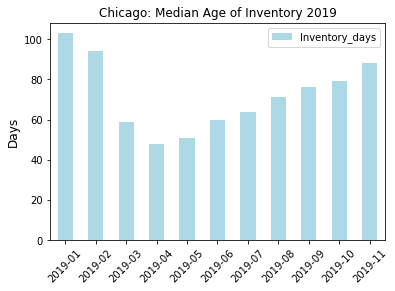

In [92]:
index = ('2019-01', '2019-02', '2019-03', '2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10', '2019-11')
Inventory_days = (103, 94, 59, 48, 51, 60, 64, 71, 76, 79, 88)
df = pd.DataFrame({'Inventory_days': Inventory_days}, index=index)
ax = df.plot(kind='bar', color= 'lightblue', rot=45)
ax.set_title("Chicago: Median Age of Inventory 2019", fontsize=12)
ax.set_ylabel("Days", fontsize=12)

In [93]:

body = client_237af5a5b5b840bd85d074b7b4b98f94.get_object(Bucket='dscapstonechicagohome2-donotdelete-pr-3wdn5jn6njbrh5',Key='ZillowSaleToListRatio_City.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

SaleList = pd.read_csv(body) # Dataframe gives percentage of sale price to list--so 1 less percentage given = discount
print(SaleList.shape)
SaleList.head()

(4746, 123)


,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10
0,1,6181,New York,City,NY,0.907576,0.914634,0.891958,0.920245,0.921723,...,0.949333,0.948610,0.942693,0.943396,0.944444,0.946199,0.955062,0.956250,0.954708,0.950003
1,2,12447,Los Angeles,City,CA,0.957447,0.947136,0.959482,0.965842,0.971984,...,0.968620,0.974010,0.979985,0.983019,0.991055,0.991667,0.988172,0.988520,0.985808,0.987569
2,3,39051,Houston,City,TX,0.932203,0.923837,0.934940,0.939803,0.949045,...,0.949838,0.950428,0.954442,0.961538,0.965966,0.968351,0.963651,0.957237,0.954023,0.953192
3,4,17426,Chicago,City,IL,0.898176,0.888611,0.906667,0.900360,0.908068,...,0.935815,0.944447,0.955869,0.970172,0.972973,0.971456,0.966565,0.961003,0.955107,0.951222
4,5,6915,San Antonio,City,TX,0.946746,0.947108,0.947704,0.957860,0.960069,...,0.967696,0.970861,0.974598,0.979016,0.984472,0.985704,0.984127,0.979321,0.976754,0.969950


In [94]:
SaleList.describe().transpose

<bound method DataFrame.transpose of           SizeRank       RegionID     2010-01     2010-02      2010-03  \
count  4746.000000    4746.000000  894.000000  928.000000  1009.000000   
mean   2304.073536   59347.085335    0.922971    0.923059     0.927884   
std    1305.445564   99455.968542    0.047229    0.046012     0.042429   
min       1.000000    3301.000000    0.737005    0.722992     0.751880   
25%    1179.250000   17165.250000    0.894195    0.893049     0.900584   
50%    2329.000000   32040.000000    0.925926    0.924704     0.931507   
75%    3434.750000   46972.500000    0.953846    0.954316     0.955855   
max    4542.000000  760887.000000    1.057747    1.048547     1.084470   

           2010-04      2010-05      2010-06      2010-07      2010-08  ...  \
count  1045.000000  1067.000000  1081.000000  1094.000000  1106.000000  ...   
mean      0.932291     0.935585     0.938550     0.934925     0.932196  ...   
std       0.041623     0.039700     0.034778     0.034334  

In [95]:
Chgo_SaleList = SaleList.loc[SaleList['RegionName'] == 'Chicago'] 
Chgo_SaleList

#Output shows that in 2019, selling homes prices in Chicago ranged between 93.5% to 97.3% of list price 
# or 3.7-6.5% less than list. Nationally in 2019, sale to list ranged 80.3% to 126.5% means there 
# homes sold about 20% less than list and there were somes sold 26.5% over list.

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10
3,4,17426,Chicago,City,IL,0.898176,0.888611,0.906667,0.90036,0.908068,...,0.935815,0.944447,0.955869,0.970172,0.972973,0.971456,0.966565,0.961003,0.955107,0.951222


In [90]:
Chgo_SaleListTR = Chgo_SaleList.transpose()
Chgo_SaleListTR.tail(24)

,3
2017-11,0.957447
2017-12,0.947741
2018-01,0.948387
2018-02,0.949721
2018-03,0.970027
2018-04,0.97387
2018-05,0.973118
2018-06,0.973056
2018-07,0.969231
2018-08,0.965517
